In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import torch
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('./new_temp_file/temperature_time')
df.drop(columns='Unnamed: 0', inplace=True)

def trend(time, slope = 0):
    return time * slope

for i in range(1,8):
    globals()['df_'+str(i)+'_temp'] = df[73462*(i-1):73462*i].reset_index().drop(columns=['index'], axis=0)

for i in range(1,8):
    mean = globals()['df_'+str(i)+'_temp']['TEMP'].mean()
    diff  = 283.733148 - mean
    globals()['df_'+str(i)+'_temp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_temp'] = globals()['df_'+str(i-5)+'_temp'].copy()

N = 6
dx = (600 - df_1_temp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_temp)-1) # 분당 증가율

time = np.arange(73462)
slope = dx_minute * 2

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_temp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_temp']['TEMP'] = series

df_temp_all = pd.concat([df_1_temp, df_2_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_temp], axis = 0)
df_temp_all = df_temp_all.reset_index().drop(columns=['index','TIME'])
tmp = np.arange(808082)
TIME = pd.DataFrame({'TIME' : tmp})
df_temp_all = pd.concat([df_temp_all, TIME], axis = 1)

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(0,73462,10):
        temp = globals()['df_'+str(i)+'_temp']['TEMP'][j:j+20]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)


print(len(group_1))
TIME = pd.DataFrame({'TIME' : np.arange(80817)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df_9_cols = tmp
df_9_cols = df_9_cols.dropna(axis = 0).reset_index().drop(columns=['index'])
df_9_cols


7347


,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,Group,TIME
0,285.886,0.703473,284.483,287.082,-0.295420,-0.875405,285.893,285.274,286.394,1,0
1,284.200,1.858006,281.401,286.690,-0.067890,-1.659449,284.126,282.486,285.963,1,1
2,282.799,0.721184,281.401,284.014,-0.285944,-0.801952,282.885,282.242,283.295,1,2
3,283.295,0.440360,282.306,284.014,-0.567776,-0.220987,283.327,283.082,283.642,1,3
4,283.836,0.709563,283.085,285.439,1.343684,0.750411,283.647,283.312,283.884,1,4
...,...,...,...,...,...,...,...,...,...,...,...
80801,859.483,0.195625,859.055,859.769,-0.407907,-0.315194,859.477,859.378,859.658,11,80811
80802,859.064,0.434339,858.337,859.755,-0.409836,-1.079603,859.194,858.643,859.396,11,80812
80803,858.936,0.407331,858.337,859.522,-0.032319,-1.664372,858.917,858.602,859.322,11,80813
80804,859.058,0.262727,858.522,859.522,0.008027,-0.418698,858.999,858.941,859.286,11,80814


In [5]:
def THRESHOLD(data):
    if data>=784.4889:
        return 11
    elif data>=731.7778:
        return 10
    elif data>=679.0667:
        return 9
    elif data>=626.3555:
        return 8
    elif data>=573.6444:
        return 7
    elif data>=520.9332:
        return 6
    elif data>=468.2221:
        return 5
    elif data>=415.5110:
        return 4
    elif data>=362.7998:
        return 3
    elif data>=310.0887:
        return 2
    else:
        return 1

In [6]:
X = df_9_cols['MEAN_TEMP'].values
Y = df_9_cols['Group'].values

predict = list(map(THRESHOLD, X))
print(accuracy_score(predict, Y))

0.6012177313565824


In [8]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
df_temp_all

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
808077,858.986,808077
808078,858.998,808078
808079,858.853,808079
808080,858.717,808080


In [248]:
from copy import deepcopy as dc
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    

    for i in range(1,n_steps+1):
        df[f'TEMP(t-{i})'] = df['TEMP'].shift(i)

    df.dropna(inplace=True)
    return df

lookback = 30
shifted_df = prepare_dataframe_for_lstm(df_temp_all, lookback)
shifted_df

,TEMP,TIME,TEMP(t-1),TEMP(t-2),TEMP(t-3),TEMP(t-4),TEMP(t-5),TEMP(t-6),TEMP(t-7),TEMP(t-8),...,TEMP(t-21),TEMP(t-22),TEMP(t-23),TEMP(t-24),TEMP(t-25),TEMP(t-26),TEMP(t-27),TEMP(t-28),TEMP(t-29),TEMP(t-30)
30,282.623,30,282.002,281.401,281.817,281.668,282.050,282.631,283.050,283.285,...,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082,286.797
31,283.325,31,282.623,282.002,281.401,281.817,281.668,282.050,282.631,283.050,...,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082
32,283.074,32,283.325,282.623,282.002,281.401,281.817,281.668,282.050,282.631,...,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938
33,283.202,33,283.074,283.325,282.623,282.002,281.401,281.817,281.668,282.050,...,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772
34,283.739,34,283.202,283.074,283.325,282.623,282.002,281.401,281.817,281.668,...,286.455,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808077,858.986,808077,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316,...,858.337,858.426,858.648,858.882,859.150,859.405,859.237,859.055,859.146,859.287
808078,858.998,808078,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,...,858.399,858.337,858.426,858.648,858.882,859.150,859.405,859.237,859.055,859.146
808079,858.853,808079,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,...,858.398,858.399,858.337,858.426,858.648,858.882,859.150,859.405,859.237,859.055
808080,858.717,808080,858.853,858.998,858.986,858.907,858.964,859.000,858.990,859.053,...,858.629,858.398,858.399,858.337,858.426,858.648,858.882,859.150,859.405,859.237


In [249]:
shifted_df.drop(columns='TIME', inplace = True)
shifted_df

,TEMP,TEMP(t-1),TEMP(t-2),TEMP(t-3),TEMP(t-4),TEMP(t-5),TEMP(t-6),TEMP(t-7),TEMP(t-8),TEMP(t-9),...,TEMP(t-21),TEMP(t-22),TEMP(t-23),TEMP(t-24),TEMP(t-25),TEMP(t-26),TEMP(t-27),TEMP(t-28),TEMP(t-29),TEMP(t-30)
30,282.623,282.002,281.401,281.817,281.668,282.050,282.631,283.050,283.285,283.232,...,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082,286.797
31,283.325,282.623,282.002,281.401,281.817,281.668,282.050,282.631,283.050,283.285,...,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082
32,283.074,283.325,282.623,282.002,281.401,281.817,281.668,282.050,282.631,283.050,...,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938
33,283.202,283.074,283.325,282.623,282.002,281.401,281.817,281.668,282.050,282.631,...,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772
34,283.739,283.202,283.074,283.325,282.623,282.002,281.401,281.817,281.668,282.050,...,286.455,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808077,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316,859.522,...,858.337,858.426,858.648,858.882,859.150,859.405,859.237,859.055,859.146,859.287
808078,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316,...,858.399,858.337,858.426,858.648,858.882,859.150,859.405,859.237,859.055,859.146
808079,858.853,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,...,858.398,858.399,858.337,858.426,858.648,858.882,859.150,859.405,859.237,859.055
808080,858.717,858.853,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,...,858.629,858.398,858.399,858.337,858.426,858.648,858.882,859.150,859.405,859.237


In [250]:
X = shifted_df.values
X

array([[282.62300015, 282.00200015, 281.40100015, ..., 285.93800015,
        287.08200015, 286.79700015],
       [283.32500015, 282.62300015, 282.00200015, ..., 285.77200015,
        285.93800015, 287.08200015],
       [283.07400015, 283.32500015, 282.62300015, ..., 286.35700015,
        285.77200015, 285.93800015],
       ...,
       [858.853     , 858.998     , 858.986     , ..., 859.405     ,
        859.237     , 859.055     ],
       [858.717     , 858.853     , 858.998     , ..., 859.15      ,
        859.405     , 859.237     ],
       [858.818     , 858.717     , 858.853     , ..., 858.882     ,
        859.15      , 859.405     ]])

In [251]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.02760464, 0.02659376, 0.02561544, ..., 0.03300088, 0.03486311,
        0.03439918],
       [0.02874737, 0.02760464, 0.02659376, ..., 0.03273066, 0.03300088,
        0.03486311],
       [0.02833879, 0.02874737, 0.02760464, ..., 0.03368294, 0.03273066,
        0.03300088],
       ...,
       [0.96560571, 0.96584174, 0.96582221, ..., 0.96650426, 0.96623079,
        0.96593453],
       [0.96538432, 0.96560571, 0.96584174, ..., 0.96608917, 0.96650426,
        0.96623079],
       [0.96554873, 0.96538432, 0.96560571, ..., 0.96565291, 0.96608917,
        0.96650426]])

In [252]:
y = X[:, 0]
X = X[:, 1:]
X.shape, y.shape

((808052, 30), (808052,))

In [253]:
train_len = int(len(X) * 0.8)
train_len

646441

In [254]:
X_train = X[:train_len]
X_test = X[train_len:]
y_train = y[:train_len]
y_test = y[train_len:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((646441, 30), (161611, 30), (646441,), (161611,))

In [255]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((646441, 30, 1), (161611, 30, 1), (646441, 1), (161611, 1))

In [256]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([646441, 30, 1]),
 torch.Size([161611, 30, 1]),
 torch.Size([646441, 1]),
 torch.Size([161611, 1]))

In [257]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [258]:
from torch.utils.data import DataLoader

batch_size = 512

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle = False)

In [259]:
for _ , batch in enumerate(train_loader):
    X_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(X_batch.shape, y_batch.shape)
    break

torch.Size([512, 30, 1]) torch.Size([512, 1])


In [260]:
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [261]:
def train_one_epoch():
    model.train(True)
    print(f"Epoch : {epoch + 1}")
    training_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(X_batch)
        loss = criterion(output, y_batch)
        training_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 1000 == 999:
            #avg_loss_cross_batches = training_loss / 1000
            print("Batch {0}, Training Loss : {1}".format(batch_size+1, loss))
        
        training_loss = 0.0

In [262]:
def validate_one_epoch():
    model.train(False)
    validation_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(X_batch)
            loss = criterion(output, y_batch)
            validation_loss += loss.item()

    avg_loss_across_batches = validation_loss / len(test_loader)

    print('Val loss : {0}'.format(avg_loss_across_batches))
    print("***********************************************")

In [263]:
from tqdm import tqdm
lr = 0.001
num_epochs = 10
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = lr)

for epoch in range(num_epochs):
    # for _ , batch in 
    train_one_epoch()
    validate_one_epoch()

Epoch : 1


Batch 513, Training Loss : 0.00043656607158482075
Val loss : 0.0038144009331172357
***********************************************
Epoch : 2
Batch 513, Training Loss : 2.169566687371116e-05
Val loss : 0.00040952127757035194
***********************************************
Epoch : 3
Batch 513, Training Loss : 1.078681270882953e-05
Val loss : 0.0007571463581127859
***********************************************
Epoch : 4
Batch 513, Training Loss : 3.759132232517004e-05
Val loss : 0.0006579864660946699
***********************************************
Epoch : 5
Batch 513, Training Loss : 1.420903208781965e-05
Val loss : 0.0005022515938172984
***********************************************
Epoch : 6
Batch 513, Training Loss : 5.946298188064247e-06
Val loss : 0.00045510168530382136
***********************************************
Epoch : 7
Batch 513, Training Loss : 9.677698471932672e-06
Val loss : 0.00042358302918350327
***********************************************
Epoch : 8
Batch 513, Train

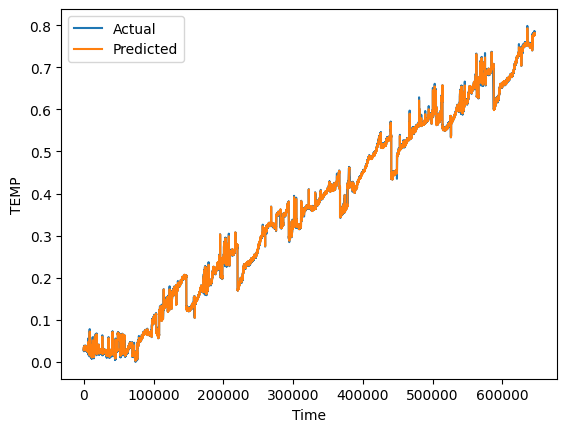

In [264]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('TEMP')
plt.legend()
plt.show()

In [265]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

In [266]:
from sklearn.metrics import r2_score, accuracy_score
print("R2 : ", r2_score(predicted, y_train))
#print("accuracy : ", accuracy_score(predicted, y_train))

R2 :  0.9997505553047424


In [267]:
train_prediction = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_prediction
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([286.38963597, 286.23391437, 285.97025065, ..., 744.28779694,
       744.29610881, 744.32477925])

In [268]:
dummies = np.zeros((y_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten(0)
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([282.62300049, 283.32500067, 283.07400042, ..., 746.51501067,
       746.19699944, 746.15800324])

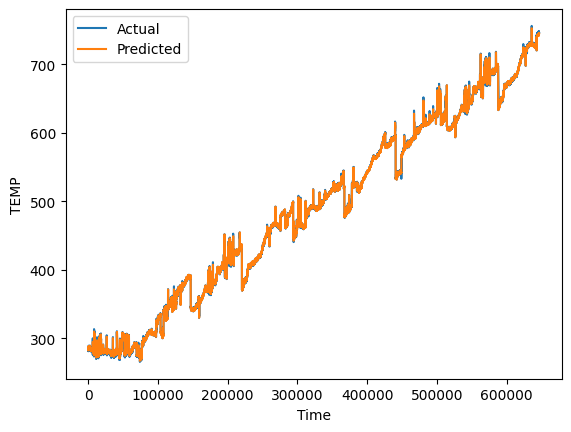

In [269]:
plt.plot(new_y_train, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('TEMP')
plt.legend()
plt.show()

In [270]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([744.33931586, 744.33777798, 744.34012141, ..., 832.62113816,
       832.6203326 , 832.59821645])

In [271]:

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([746.11501589, 746.1960108 , 746.45001701, ..., 858.85298217,
       858.7169898 , 858.81801375])

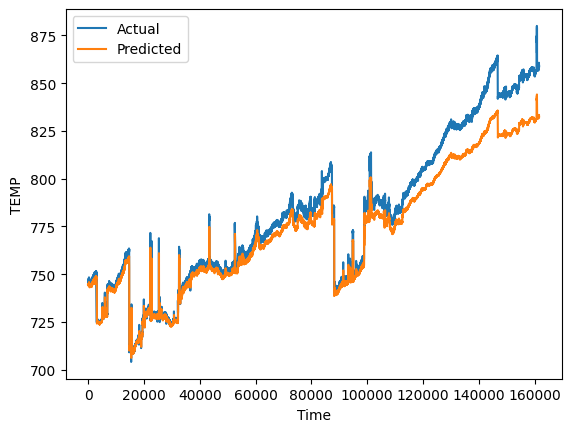

In [272]:
plt.plot(new_y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('TEMP')
plt.legend()
plt.show()

In [273]:
new_y_test.shape, test_predictions.shape

((161611,), (161611,))

In [274]:
print(r2_score(new_y_test, test_predictions))

0.9230921972901162


In [275]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(new_y_test, test_predictions))
print(mean_squared_error(new_y_test, test_predictions))


8.104933258048977
123.49927171603416


## Transformer